In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('png')
import seaborn as sns
sns.set_context("paper")
sns.set_style("ticks");

# Homework 1

## References

+ Module 1: Introduction
+ Module 2: Modern Machine Learning Software

## Instructions

+ Type your name and email in the "Student details" section below.
+ Develop the code and generate the figures you need to solve the problems using this notebook.
+ For the answers that require a mathematical proof or derivation you should type them using latex. If you have never written latex before and you find it exceedingly difficult, we will likely accept handwritten solutions.
+ The total homework points are 100. Please note that the problems are not weighed equally.

## Student details

+ **First Name:**Yikai
+ **Last Name:**Liu
+ **Email:**liu3307@purdue.edu
+ **Used generative AI to complete this assignment (Yes/No):**No
+ **Which generative AI tool did you use (if applicable)?:**No

## Problem 1 - Recursion vs Iteration

This problem adjusted from the [Structure and Interpretation of Computer Programs](https://mitpress.mit.edu/sites/default/files/sicp/full-text/book/book.html) book.
In particular from [this section](https://mitp-content-server.mit.edu/books/content/sectbyfn/books_pres_0/6515/sicp.zip/full-text/book/book-Z-H-11.html#%_sec_1.2.1).

Imagine you are working with a programming language that does not have loops.
This is how you have to think when writing code in `Jax`.
Let's say we want to write a function that calculates the factorial of a number:

$$
n! = n \times (n-1) \times (n-2) \times \dots \times 1
$$

The standard recursive definition of the factorial function is:

In [2]:
def factorial(n):
    if n == 0:
        return 1
    else:
        return n * factorial(n-1)

Here is how it can be used:

In [3]:
factorial(5)

120

Let's unroll what actually happens behind the scenes:

```python
factorial(5)
5 * factorial(4)
5 * (4 * factorial(3))
5 * (4 * (3 * factorial(2)))
5 * (4 * (3 * (2 * factorial(1))))
5 * (4 * (3 * (2 * 1)))
5 * (4 * (3 * 2))
5 * (4 * 6)
5 * 24
120
```

You quickly notice, that the amount of intermediate results that are stored in memory grows exponentially with the input.
This won't work for large inputs, because you will run out of memory.
But, there is another way to achieve the same result without exploding memory usage.
We could start by multiplying 1 by 2, then the result with 3, then the result with 4, and so on.
So, we keep track of a running product that we update.
We don't need a loop to do this kind of iteration.
We can do it with recursion:

In [4]:
def fact_iter(product, counter, max_iter):
    if counter > max_iter:
        return product
    else:
        return fact_iter(counter * product, counter + 1, max_iter)

def good_factorial(n):
    return fact_iter(1, 1, n)

Check that this works as before:

In [5]:
good_factorial(5)

120

Here is how this unrolls:

```python
factorial(5)
fact_iter(1, 1, 5)
fact_iter(1, 2, 5)
fact_iter(2, 3, 5)
fact_iter(6, 4, 5)
fact_iter(24, 5, 5)
fact_iter(120, 6, 5)
120
```

We say that the second approach is *iterative* and the first approach is *recursive*.
We want to be writing iterative code, because it is more efficient.

Write iterative code that, given $n$, computes the fibonacci number:

$$
f_n = f_{n-1} + f_{n-2}
$$

where $f_0 = 0$ and $f_1 = 1$.
You should not use a loop!

**Answer:**

In [6]:
def fib_iterative(a, b, n):
    if n == 0:
        return a
    else:
        return fib_iterative(b, a + b, n - 1)

def fibonacci(n):
    return fib_iterative(0, 1, n)


for i in range(6):
    print(f"Fibonacci({i}) = {fibonacci(i)}")


Fibonacci(0) = 0
Fibonacci(1) = 1
Fibonacci(2) = 1
Fibonacci(3) = 2
Fibonacci(4) = 3
Fibonacci(5) = 5


*Here show how your code works for $n=5$ like I did above with the factorial example.*

## Problem 2 - The `foldl` function

The `foldl` function is a higher order function that is used to implement iteration.
It is defined as follows:

$$
\text{foldl}(f, z, [x_1, x_2, \dots, x_n]) = f(f(\dots f(f(z, x_1), x_2), \dots), x_n)
$$

where $f$ is a function that takes two arguments and $z$ is the initial value.
In words, `foldl` takes a function $f$, an initial value $z$, and a list $[x_1, x_2, \dots, x_n]$.
It then applies $f$ to $z$ and the first element of the list, then applies $f$ to the result of the previous application and the second element of the list, and so on.

Implement `foldl` in `Python`. Pay attention to create an iterative implementation.

**Answer:**

In [7]:
# Your code here - Demonstrate that it works
def foldl(f, z, xs):
    for x in xs:
        z = f(z, x)
    return z

# Demonstrate summation
def add(x, y):
    return x + y

def multiply(x, y):
    return x * y



Use your `foldl` function to implement the `sum` function and the `product` function.

**Answer:**

In [8]:
# Your code here - Demonstrate that it works
# Testing foldl
numbers = [1, 2, 3, 4]
sum_result = foldl(add, 0, numbers)
product_result = foldl(multiply, 1, numbers)
print(f"Sum: {sum_result}")
print(f"Product: {product_result}")

Sum: 10
Product: 24


## Problem 3 - No Loops in Jax

Use `Jax`'s [`jax.lax.scan`](https://jax.readthedocs.io/en/latest/_autosummary/jax.lax.scan.html) to implement and `jit` a function that returns the Fibonacci sequence up to a given number.
Don't bother using integer types, just use `float32` for everything.

**Answer:**

In [9]:
import jax
import jax.numpy as jnp
from jax import jit, lax
from functools import partial
def fibonacci_scan(n):
    """
    Generate Fibonacci sequence up to the nth number using jax.lax.scan.

    Parameters:
    n (int): The number of Fibonacci numbers to generate.

    Returns:
    jnp.ndarray: The Fibonacci sequence as a JAX array of float32.
    """
    def fib_step(carry, _):
        a, b = carry
        return (b, a + b), b

    # Initial values (0th and 1st Fibonacci numbers)
    init = (jnp.float32(0.0), jnp.float32(1.0))

    # Run the scan for n - 1 steps (we already include the first value in `init`)
    _, fib_sequence = lax.scan(fib_step, init, jnp.arange(n))

    # Include the initial value `0` as the start of the sequence
    return jnp.concatenate([jnp.array([0.0], dtype=jnp.float32), fib_sequence])

# Wrapper to handle concrete n for JIT
@partial(jit, static_argnums=(0,))
def generate_fibonacci(n):
    return fibonacci_scan(int(n))

# Example usage
n = 10  # Generate Fibonacci sequence up to the 10th number
result = generate_fibonacci(n)
print(result)


[ 0.  1.  1.  2.  3.  5.  8. 13. 21. 34. 55.]


## Problem 4 - Feigenbaum Map

Consider the function:

$$
f(x; r) = r x (1 - x)
$$

where $r$ is a parameter.
One can define dynamics on the real line by iterating this function:

$$
x_{n+1} = f(x_n; r)
$$

where $x_n$ is the state at time $n$.

This map exhibits a [period doubling cascade](https://en.wikipedia.org/wiki/Feigenbaum_constants) as $r$ increases.

Write a function in `jax`, call it `logistic_map`, that takes a lot of $r$'s and $x_0$'s as inputs and returns the first $n$ states of the system.
You should independently vectorize for the $r$'s and the $x_0$'s.
And you should `jit`.
Use `jax.lax.scan` to implement the iteration.

**Answer:**

In [10]:
import jax
import jax.numpy as jnp
from jax import jit, lax

def logistic_map(rs, x0s, n):
    def map_step(x, r):
        return r * x * (1 - x)

    def scan_step(carry, _):
        x = map_step(carry, rs[:, None])
        return x, x

    init = jnp.broadcast_to(x0s[None, :], (len(rs), len(x0s)))

    _, states = lax.scan(scan_step, init, None, length=n)

    return states.transpose((1, 2, 0))

logistic_map = jit(logistic_map, static_argnames=("n",))


x0s = jnp.linspace(0, 1, 100)
rs = jnp.linspace(0, 4, 1_000)
n = 10_000

data = logistic_map(rs, x0s, n)
print(data.shape)  # Should be (1000, 100, 10000)


(1000, 100, 10000)


Test your code here:

In [11]:
x0s = jnp.linspace(0, 1, 100)
rs = jnp.linspace(0, 4, 1_000)
n = 10_000
data = logistic_map(rs, x0s, n)

Your shape should  be `(1000, 100, 10000)`:

In [12]:
data.shape

(1000, 100, 10000)

Discard all but the last iteration:

In [13]:
data = data[:, :, -1:]

In [14]:
cc = data.reshape(data.shape[0], data.shape[1] * data.shape[2]).T
print(cc.shape,rs.shape)

(100, 1000) (1000,)


Make the famous period doubling plot. The plot will take a while and it will take a lot of memory. I suggest you restart your kernel before moving to the next problem.

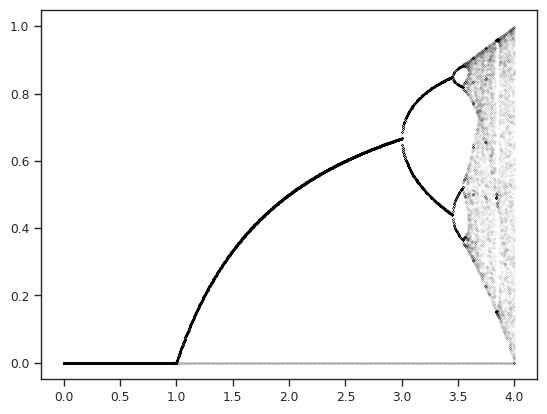

In [16]:
fig, ax = plt.subplots()
ax.plot(rs,
        data.reshape(data.shape[0], data.shape[1] * data.shape[2]),
        '.k',
        ms=0.1,
        alpha=0.5
);

## Problem 5 - Implement autoencoders in `jax`, `equinox`, and `optax`

Implement [autoencoders](https://en.wikipedia.org/wiki/Autoencoder) in `jax` and train it on the MNIST dataset.
Autoencoders, consist of two neural networks, an encoder and a decoder. The encoder maps the input to a latent space (typically of a much smaller dimension than the input), and the decoder maps the latent space back to the input space.
You can think of the encoder as a compression algorithm and the decoder as a decompression algorithm.
Alternatively, you can think of the encoder as the projection of the input data onto a lower-dimensional manifold, and the decoder as the reconstruction operator.

### Part A
Follow these directions:
+ Pick the dimension of the latent space to be 2. This means that the encoder will map the input to a 2-dimensional space, and the decoder will map the 2-dimensional space back to the input space.
+ Your encoder should work on a flattened version of the input image. This means that the input to the encoder is a vector of 784 elements (28x28).
+ Start by picking your encoder $z = f(x;\theta_f)$ to be a neural network with 2 hidden layers, each with 128 units and ReLU activations. Increase the number of units and layers if you think it is necessary.
+ Start by picking your decoder $x' = g(z;\theta_g)$ to be a neural network with 2 hidden layers, each with 128 units and ReLU activations. Increase the number of units and layers if you think it is necessary.
+ Make all your neural networks in `equinox`.
+ The loss function is the mean squared error between the input and the output of the decoder:

$$
\mathcal{L} = \frac{1}{N}\sum_{i=1}^N ||x_i - g(f(x_i;\theta_f);\theta_g)||^2.
$$

where $N$ is the number of samples in the dataset.
+ Split the MNIST dataset into a training and a test set.
+ Use `optax` for the optimization.
+ Train the autoencoder using the Adam optimizer with a learning rate of 0.001 for 1 epoch to debug. Use a batch size of 32. Feel free to play with the learning rate and batch size.
+ Monitor the loss function on the training and test set. Increase the number of epochs up to the point where the loss function on the test set stops decreasing.

Here is the dataset:

In [15]:
# Download the MNIST dataset
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, parser='auto')

# Split the dataset into training and test sets
from sklearn.model_selection import train_test_split
X_train_val, X_test, y_train_val, y_test = train_test_split(
    mnist.data, mnist.target, test_size=10000, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=10000, random_state=42)


/usr/local/lib/python3.11/dist-packages/sklearn/datasets/_openml.py:110: UserWarning: A network error occurred while downloading https://api.openml.org/api/v1/json/data/list/data_name/mnist_784/limit/2/data_version/1. Retrying...
  warn(


URLError: <urlopen error [Errno 110] Connection timed out>

**Answer:**

*Put your answer here. Use as many markdown and code blocks as you want.*

In [ ]:
# your code
import jax
import jax.numpy as jnp
import equinox as eqx
import optax
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define the Encoder
class Encoder(eqx.Module):
    layers: list

    def __init__(self, latent_dim=2, key=None):
        keys = jax.random.split(key, 3)
        self.layers = [
            eqx.nn.MLP(
                in_size=784,
                out_size=128,
                width_size=128,
                depth=2,
                activation=jax.nn.relu,
                key=keys[0],
            ),
            eqx.nn.Linear(128, latent_dim, key=keys[1]),
        ]

    def __call__(self, x):
        x = x.reshape(x.shape[0], -1)  # Flatten the input
        for layer in self.layers[:-1]:
            x = layer(x)
        return self.layers[-1](x)  # Map to latent space


# Define the Decoder
class Decoder(eqx.Module):
    layers: list

    def __init__(self, latent_dim=2, key=None):
        keys = jax.random.split(key, 3)
        self.layers = [
            eqx.nn.Linear(latent_dim, 128, key=keys[0]),
            eqx.nn.MLP(
                in_size=128,
                out_size=784,
                width_size=128,
                depth=2,
                activation=jax.nn.relu,
                key=keys[1],
            ),
        ]

    def __call__(self, z):
        for layer in self.layers[:-1]:
            z = layer(z)
        z = self.layers[-1](z)
        return z.reshape(-1, 28, 28)  # Reshape back to 28x28 image


# Loss Function
def compute_loss(params, encoder, decoder, batch):
    x = batch
    z = encoder(x)
    x_reconstructed = decoder(z)
    return jnp.mean((x - x_reconstructed) ** 2)


# Training Loop
def train_autoencoder(encoder, decoder, dataloader, epochs=10, lr=0.001, key=None):
    optimizer = optax.adam(lr)
    opt_state = optimizer.init((encoder, decoder))

    @jax.jit
    def step(params, opt_state, batch):
        encoder, decoder = params
        loss, grads = jax.value_and_grad(compute_loss, argnums=(0, 1))(params, encoder, decoder, batch)
        updates, opt_state = optimizer.update(grads, opt_state)
        new_encoder = eqx.apply_updates(encoder, updates[0])
        new_decoder = eqx.apply_updates(decoder, updates[1])
        return loss, (new_encoder, new_decoder), opt_state

    for epoch in range(epochs):
        for batch, _ in dataloader:
            batch = jnp.array(batch.numpy()) / 255.0  # Normalize inputs
            loss, (encoder, decoder), opt_state = step((encoder, decoder), opt_state, batch)
        print(f"Epoch {epoch + 1}, Loss: {loss:.4f}")

    return encoder, decoder


# Main
def main():
    key = jax.random.PRNGKey(42)

    # Load MNIST dataset
    transform = transforms.Compose([transforms.ToTensor()])
    train_dataset = datasets.MNIST(".", train=True, download=True, transform=transform)
    test_dataset = datasets.MNIST(".", train=False, download=True, transform=transform)

    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

    # Initialize encoder and decoder
    encoder = Encoder(latent_dim=2, key=key)
    decoder = Decoder(latent_dim=2, key=key)

    # Train autoencoder
    trained_encoder, trained_decoder = train_autoencoder(
        encoder, decoder, train_loader, epochs=1, lr=0.001, key=key
    )


if __name__ == "__main__":
    main()


### Part B

Pick the first five digits in the test set and plot the original and reconstructed images.

**Answer:**

In [ ]:
# your code here

### Part C

Plot the projections of the digits in the latent space (training and test).

**Answer:**

In [ ]:
# your code here

### Part D

Use `scikitlearn` to fit a mixture of Gaussians to the latent space. Use 10 components.
Then sample five times from the fitted mixture of Gaussians, reconstruct the samples, and plot the reconstructed images.

**Answer:**

In [ ]:
# your code here